## Visualizing Flotation Processes Using Data Science Techniques

In [1]:
# Libries  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data
Feeder=pd.read_csv(r"file:///C:\Users\PortiaMa\OneDrive%20-%20mintek.co.za\Documents\Data.csv")
Feeder.head(3)

C:\Users\PortiaMa\AppData\Local\Temp\ipykernel_13836\1291196617.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,48,49,50,53,54,55,56,57,58,59,60,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174) have mixed types. Specify dtype option on import or set low_memory=False.
  Feeder=pd.read_csv(r"file:///C:\Users\PortiaMa\OneDrive%20-%20mintek.co.za\Documents\Data.csv")


,timestamp,210:CRG0001_KW,210:CV001_FINO,210:CV001_GRUESO,210:CV001_INTERM1,210:CV001_INTERM2,210:HOP_FINO,210:HOP_GRUESO,210:HOP_INTERM,210:WI00115,...,330:XRF_CRS3.Sol,330:XRF_RF003.Cu,330:XRF_RF003.Fe,330:XRF_RF003.Sol,330:XRF_SAL17.Cu,330:XRF_SAL18.Cu,C:310_TonHumMol,LIMS:Cabeza_Cu.Esp,LIMS:Concentrado_Cu.Esp,LIMS:Relave_Cu.Esp
0,2023-09-01 07:00:00-05:00,428.6447,0.0,0,0,0,0.000208251,0,0,2064.37,...,38.24622,0.2281283,2.242711,43.87353,0.040072,0.03366,4321.29,0.2199621,25.32975,0.0319834
1,2023-09-01 07:10:00-05:00,617.9507,32.71233,23.56759,20.24949,22.97453,0.000208251,0,0,5593.605,...,37.82159,0.2347573,2.351156,45.92285,0.037431,0.042279,4163.601,0.2199621,25.32975,0.0319834
2,2023-09-01 07:20:00-05:00,427.9856,41.30634,11.89185,22.66584,16.28979,0.000208251,0,0,5846.607,...,38.86111,0.2308349,2.288843,43.17145,0.039929,0.045171,4259.805,0.2199621,25.32975,0.0319834


In [2]:
copper=Feeder[['330:XRF_RF003.Cu','330:XRF_SAL17.Cu']]
copper.head(3)

,330:XRF_RF003.Cu,330:XRF_SAL17.Cu
0,0.2281283,0.040072
1,0.2347573,0.037431
2,0.2308349,0.039929


In [4]:
Cu_numeric=copper.apply(lambda x: pd.to_numeric(x,errors='coerce'))
Cu_numeric

,330:XRF_RF003.Cu,330:XRF_SAL17.Cu
0,0.228128,0.040072
1,0.234757,0.037431
2,0.230835,0.039929
3,0.221385,0.037181
4,0.230204,0.037181
...,...,...
18212,0.566084,0.060874
18213,0.545628,0.063310
18214,0.523068,0.069405
18215,0.509332,0.069405


In [4]:
Cu_numeric.dropna(inplace=True)
print(Cu_numeric)

       330:XRF_RF003.Cu  330:XRF_SAL17.Cu
0              0.228128          0.040072
1              0.234757          0.037431
2              0.230835          0.039929
3              0.221385          0.037181
4              0.230204          0.037181
...                 ...               ...
18212          0.566084          0.060874
18213          0.545628          0.063310
18214          0.523068          0.069405
18215          0.509332          0.069405
18216          0.551508          0.056095

[17677 rows x 2 columns]


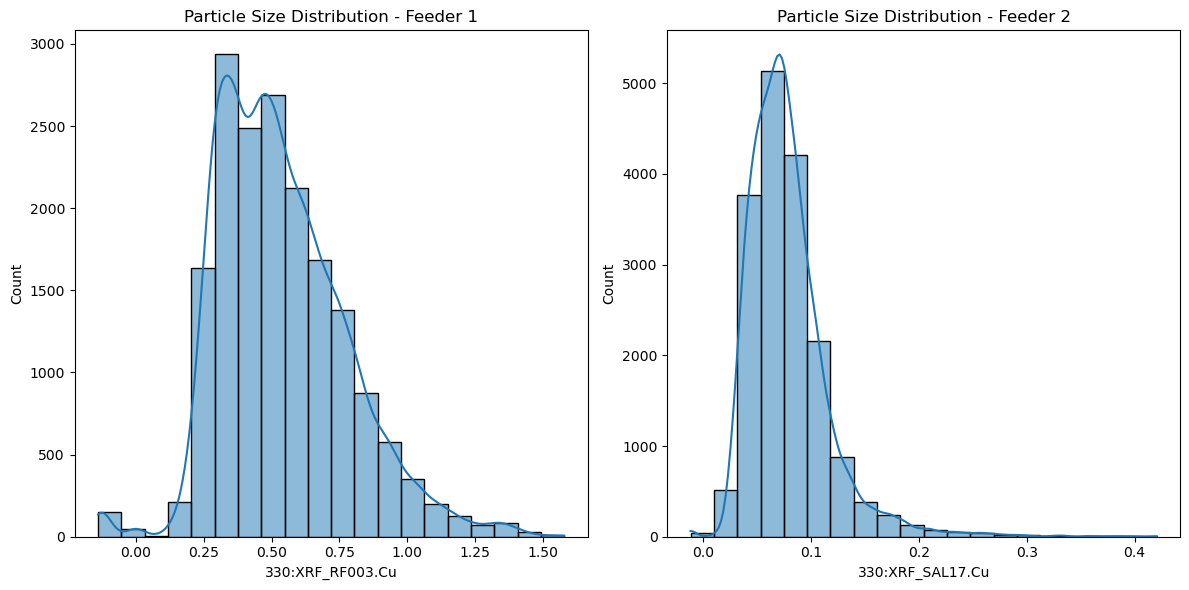

In [5]:
# Visualization 1: Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(Cu_numeric['330:XRF_RF003.Cu'], bins=20, kde=True)
plt.title('Particle Size Distribution - Feeder 1')

plt.subplot(1, 2, 2)
sns.histplot(Cu_numeric['330:XRF_SAL17.Cu'], bins=20, kde=True)
plt.title('Particle Size Distribution - Feeder 2')

plt.tight_layout()
plt.show()

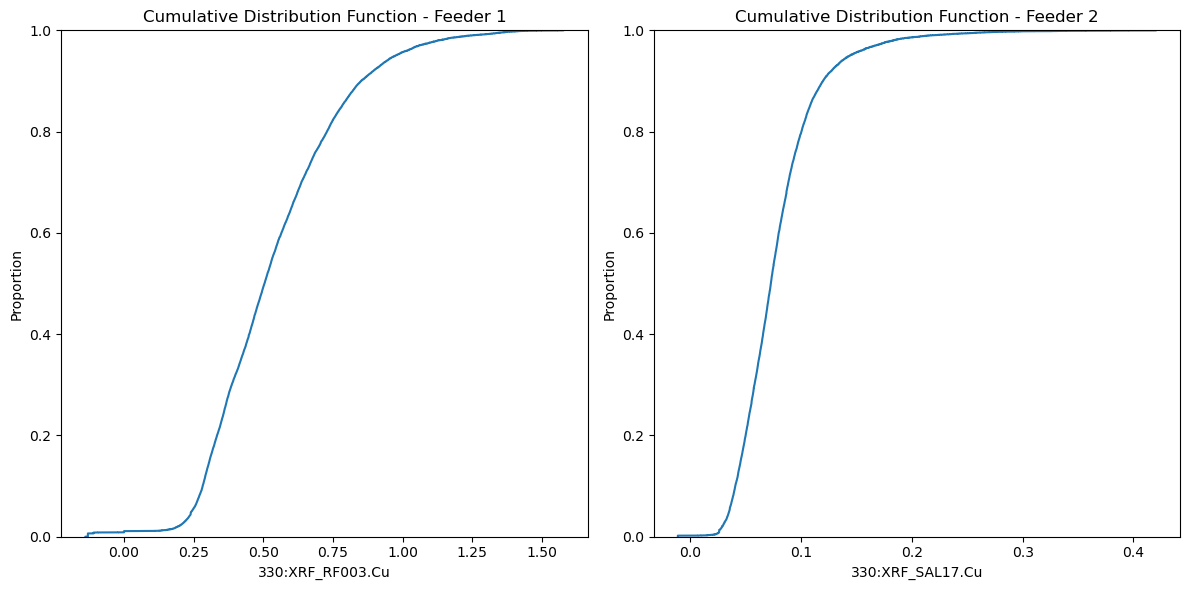

In [6]:
# Visualization 2: Cumulative Distribution Function (CDF)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.ecdfplot(data=Cu_numeric, x=Cu_numeric['330:XRF_RF003.Cu'])
plt.title('Cumulative Distribution Function - Feeder 1')

plt.subplot(1, 2, 2)
sns.ecdfplot(data=Cu_numeric, x='330:XRF_SAL17.Cu')
plt.title('Cumulative Distribution Function - Feeder 2')

plt.tight_layout()
plt.show()

In [7]:
# Analysis: Comparing Mean Particle Size
mean_size_feeder1 = Cu_numeric['330:XRF_RF003.Cu'].mean()
mean_size_feeder2 = Cu_numeric['330:XRF_SAL17.Cu'].mean()

# Round to two decimal places
mean_size_feeder1_rounded = round(mean_size_feeder1, 2)
mean_size_feeder2_rounded = round(mean_size_feeder2, 2)

print(f'Mean Particle Size - Feeder 1: {mean_size_feeder1_rounded}')
print(f'Mean Particle Size - Feeder 2: {mean_size_feeder1_rounded}')

Mean Particle Size - Feeder 1: 0.54
Mean Particle Size - Feeder 2: 0.54


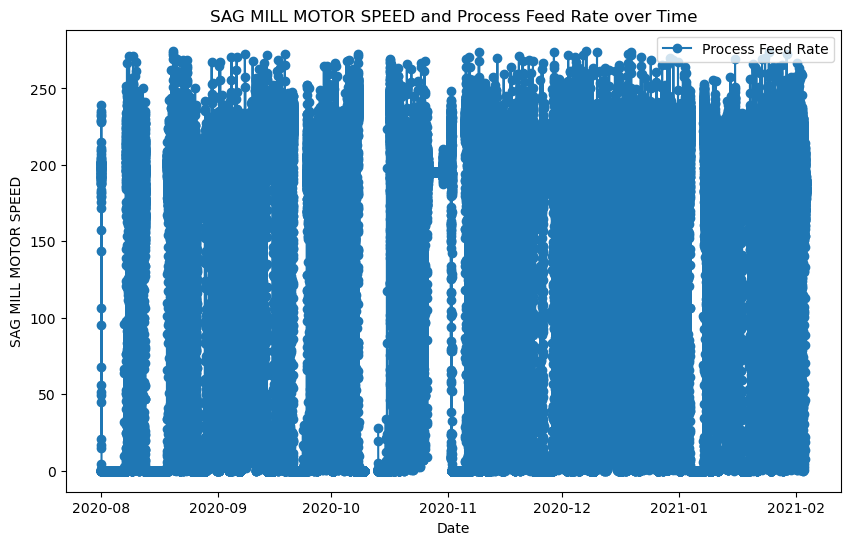

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Feeder=pd.read_excel(r"file:///C:\Users\PortiaMa\Documents\MAC\All%20process%20feed%20rate%20and%20Sag%20mill%20power.xlsx")
Feeder.head(3)

# Convert the 'Date' column to datetime 
Feeder['Unnamed: 0'] = pd.to_datetime(Feeder['Unnamed: 0'], errors='coerce')
Feeder['Unnamed: 0'].head(3)   
  
# Convert to numeric
Feeder_numeric=Feeder[['Process Feed Rate','SAG MILL POWER','SAG MILL MOTOR SPEED']].apply(lambda x:pd.to_numeric(x,errors='coerce'))
Feeder_numeric.head(3)


# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(Feeder['Unnamed: 0'], Feeder_numeric['Process Feed Rate'], label='Process Feed Rate', marker='o')
plt.title('SAG MILL MOTOR SPEED and Process Feed Rate over Time')
plt.xlabel('Date')
plt.ylabel('SAG MILL MOTOR SPEED')
plt.legend()
plt.grid(False)
plt.show()


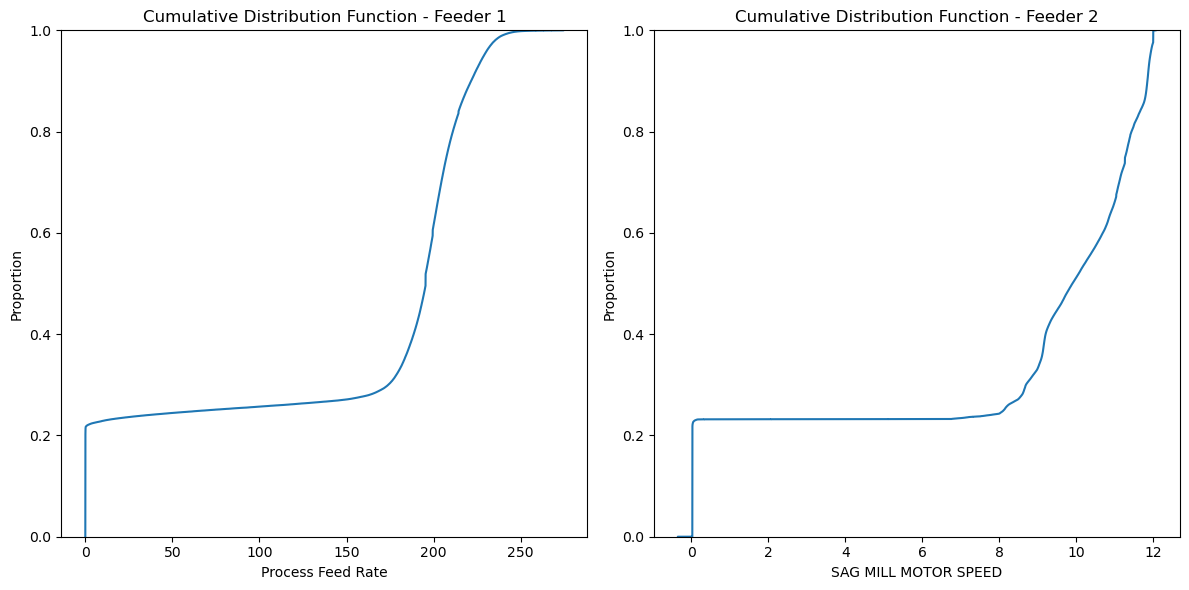

In [23]:
# Visualization 2: Cumulative Distribution Function (CDF)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.ecdfplot(data=Feeder_numeric, x=Feeder_numeric['Process Feed Rate'])
plt.title('Cumulative Distribution Function - Feeder 1')

plt.subplot(1, 2, 2)
sns.ecdfplot(data=Feeder_numeric, x=Feeder_numeric['SAG MILL MOTOR SPEED'])
plt.title('Cumulative Distribution Function - Feeder 2')

plt.tight_layout()
plt.show()

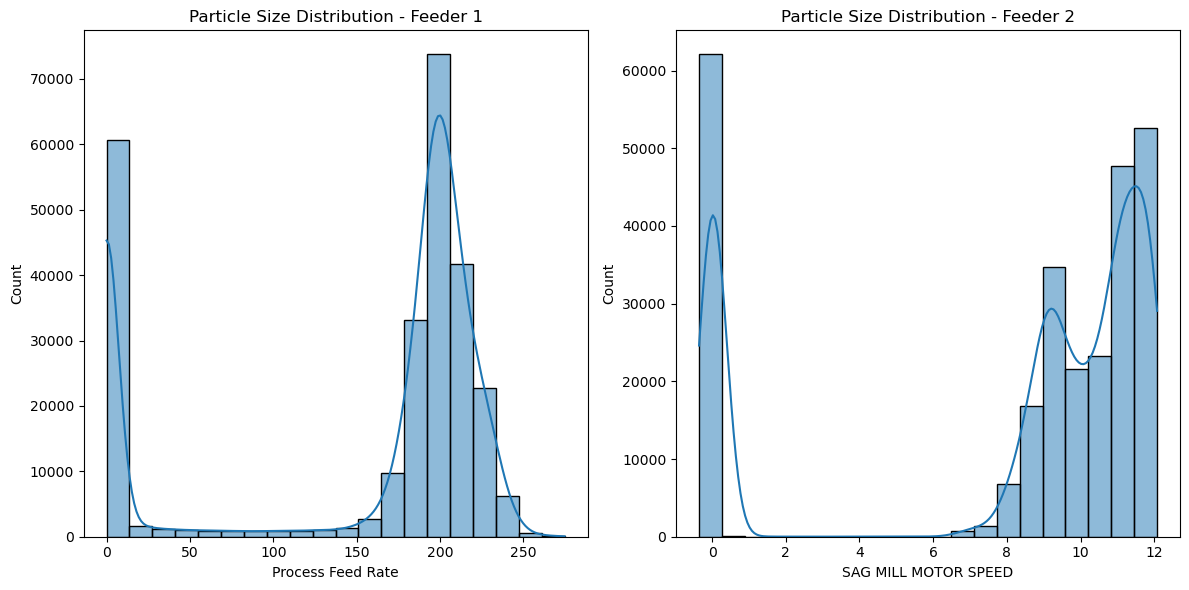

In [24]:
# Visualization 1: Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(Feeder_numeric['Process Feed Rate'], bins=20, kde=True)
plt.title('Particle Size Distribution - Feeder 1')

plt.subplot(1, 2, 2)
sns.histplot(Feeder_numeric['SAG MILL MOTOR SPEED'], bins=20, kde=True)
plt.title('Particle Size Distribution - Feeder 2')

plt.tight_layout()
plt.show()

#### Is there a greater tendency for coarse or fine material in any of them? Can you theorize the reasons for this?

The theoretical reasons for differences in particle size distribution between feeders could include variations in the source material, different feeder designs, or variations in the operational conditions of each feeder. Investigating the equipment specifications, operating parameters, and characteristics of the feed materials can provide insights into the observed differences.